
# Data Exploration and Visualization

First we read in the dataframe that we created in the previous notebook.

In [5]:
import pandas as pd
df = pd.read_csv('/content/df_tracks.csv')
df = df.iloc[: , 1:]

df

,Title,Popularity,Artist,Album,Number of Tracks in Album,Related Artists,Explicit,Average Duration of Segments,brightness,flatness,...,instrumentalness,liveness,valence,tempo,duration,time_signature,fade in,fade out,info,Lyrics
0,God's Plan,83,Drake,Scorpion,25,"Big Sean, J. Cole, DJ Khaled, Meek Mill, Futur...",Explicit,231.890759,39.845464,21.759221,...,0.000083,0.5520,0.357,77.169,3.316217,4,0.000000,0.068333,Drake may refer to:,"Yeah, they wishin' and wishin' and wishin' and..."
1,Lucid Dreams,83,Juice WRLD,Goodbye & Good Riddance,17,"NAV, Comethazine, Trippie Redd, Lil Tecca, Blu...",Explicit,250.671292,26.918125,-22.883286,...,0.000000,0.3400,0.218,83.903,3.997267,4,0.000314,0.054277,"Jarad Anthony Higgins (December 2, 1998 – Dece...","Enviyon on the mix No, no, no, no No, no, no,..."
2,SICKO MODE,81,Travis Scott,ASTROWORLD,17,"A$AP Rocky, A$AP Ferg, Chief Keef, Joey Bada$$...",Explicit,236.685634,58.408027,-24.692282,...,0.000000,0.1240,0.446,155.008,5.213667,4,0.000000,0.018448,"Jacques Bermon Webster II (born April 30, 1991...","Astro' Yeah Sun is down, freezing cold That's..."
3,a lot,80,21 Savage,i am > i was,15,"Quavo, Gunna, Young Thug, Don Toliver, Huncho ...",Explicit,283.760186,10.461452,-52.394945,...,0.001250,0.3420,0.274,145.972,4.810400,4,0.000229,0.044449,"Shéyaa Bin Abraham-Joseph (born October 22, 19...",I love you Turn my headphone down a little bit...
4,Plug Walk,69,Rich The Kid,The World Is Yours,15,"Quality Control, Famous Dex, Baka Not Nice, Yu...",Explicit,223.249444,24.667761,6.185388,...,0.000000,0.1080,0.158,94.981,2.920500,4,0.000565,0.108696,"Dimitri Leslie Roger (born July 13, 1992),[3][...","Ayy, ayy, plug walk (plug walk, plug, plug) I ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Gwendolynn's Apprehension,46,Mick Jenkins,Pieces of a Man,17,"Saba, Pivot Gang, Kirk Knight, Rejjie Snow, AK...",Explicit,264.972310,9.048543,-10.534785,...,0.000000,0.1200,0.680,91.352,3.758883,4,0.000438,0.037645,Mick Jenkins may refer to:,"We, real cool We, left school We, lurk late We..."
125,on the rocks,29,Mereba,The Jungle Is The Only Way Out,13,"Marco McKinnis, Leven Kali, Jean Deaux, Rayana...",Clean,215.401786,-52.385554,-33.543290,...,0.000000,0.0871,0.160,91.110,0.896000,4,0.005898,0.092431,"Marian Azeb Mereba (born September 19, 1990), ...",NaN
126,Truman,35,Lil Dicky,Professional Rapper,20,"VIC MENSA, Bryce Vine, Chris Webby, Hoodie All...",Explicit,287.618539,1.527897,13.110137,...,0.000000,0.3390,0.636,88.748,10.242733,4,0.000133,0.010241,"David Andrew Burd (born March 15, 1988), bette...",Ay Man Man Ay I guess ya'll on board Young ma...
127,Harlem Renaissance,28,Immortal Technique,The 3rd World,18,"Jedi Mind Tricks, Army Of The Pharaohs, R.A. T...",Explicit,275.613552,66.654272,6.501915,...,0.000000,0.3920,0.752,90.736,3.737117,4,0.000776,0.013711,"Felipe Andres Coronel (born February 19, 1978)...","""Let me welcome both of you Uh, to the show th..."


As mentioned earlier, it'd not be feasible to use regression. Additionally, it's not as useful. The record label cares less about the specific number of the popularity score, but rather, more broadly what level of popularity the artist is at. Hence, we'll be classifying tracks into 3 levels of popularity: high medium and low. Instead of doing this in percentages (bottom 33% is low for example), we'll use percentiles. This is because, as visualized below, popularity does not have a normal distribution. 

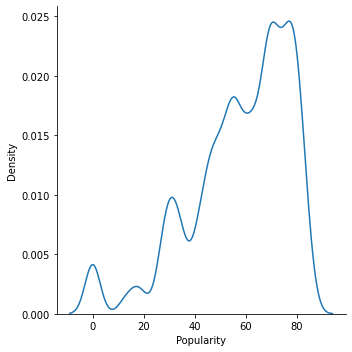

In [6]:
import seaborn as sns

sns.displot(df, x="Popularity", kind="kde", bw_adjust=0.4)

From this, we can see that the distribution isn't uniform, so we can't just use a standard categorization (e.g. 0-33 as low, 33-66 as medium, and 66-100 as high). Instead, we'll have to define the categories dependent on the data. To do this, we can use percentiles. 

In [7]:
import numpy as np
popularity_categories = []

for i in range(1,4):
  popularity_categories.append(df["Popularity"].quantile(i/3))

popularity_categories

conditions = [
    df["Popularity"] < popularity_categories[0],
    (df["Popularity"] >= popularity_categories[0]) & (df["Popularity"] < popularity_categories[1]),
    (df["Popularity"] >= popularity_categories[1]) & (df["Popularity"] <= popularity_categories[2])
]
categories = ["Low", "Medium", "High"]

df['Popularity Categories'] = np.select(conditions, categories, default=0)


As we can see below, the 3 categories have the same number of songs.

<Axes: xlabel='Popularity Categories'>

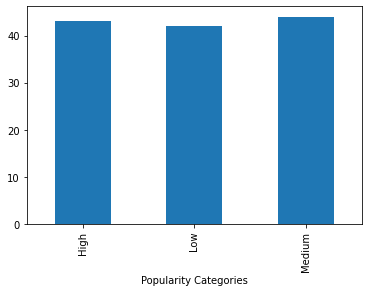

In [8]:
# showing new categories
df.groupby(["Popularity Categories"])["Title"].count().plot.bar()

<Axes: ylabel='Popularity Categories'>

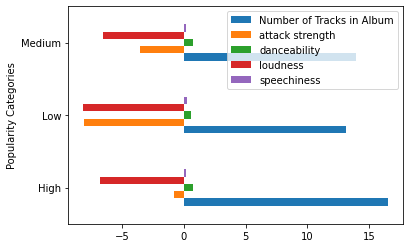

In [9]:
df.groupby(["Popularity Categories"])[["Number of Tracks in Album", "attack strength", "danceability", "loudness", "speechiness"]].mean().plot.barh()

One interesting observation here is the apparent difference in the attack strength of High popularity tracks and Low/Medium popularity tracks.

Let's now explore the correlation between the various quantitative variables and popularity.

<Axes: >

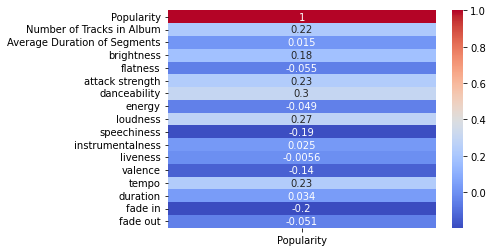

In [10]:
df["Popularity"] = df["Popularity"].astype("float64")
df["Number of Tracks in Album"] = df["Number of Tracks in Album"].astype("int64")
df["Average Duration of Segments"] = df["Average Duration of Segments"].astype("float64")
df["duration"] = df["duration"].astype("float64")
df["fade in"] = df["fade in"].astype("float64")
df["fade out"] = df["fade out"].astype("float64")


df_quantitative = df[["Popularity", "Number of Tracks in Album", "Average Duration of Segments", "brightness", "flatness", "attack strength", "danceability", "energy",  "loudness" ,
            "speechiness", "instrumentalness", "liveness", "valence", "tempo", "duration", "fade in", "fade out"]]
correlation_matrix = df_quantitative.corr()
sns.heatmap(correlation_matrix[['Popularity']], cmap='coolwarm', annot=True)



From the above, we can see that the variables with the most correlation to popularity are danceability, loudness, number of tracks in album, attack strength, and speechiness

<Axes: >

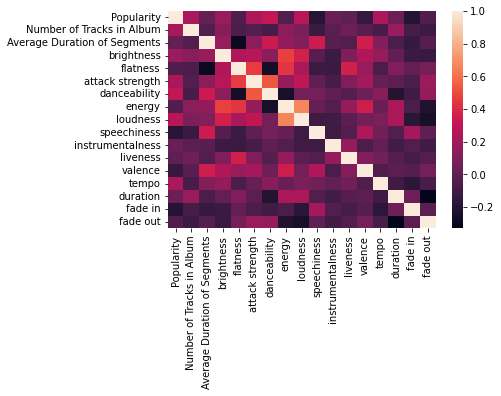

In [11]:
sns.heatmap(correlation_matrix)

Distribution of audio features:

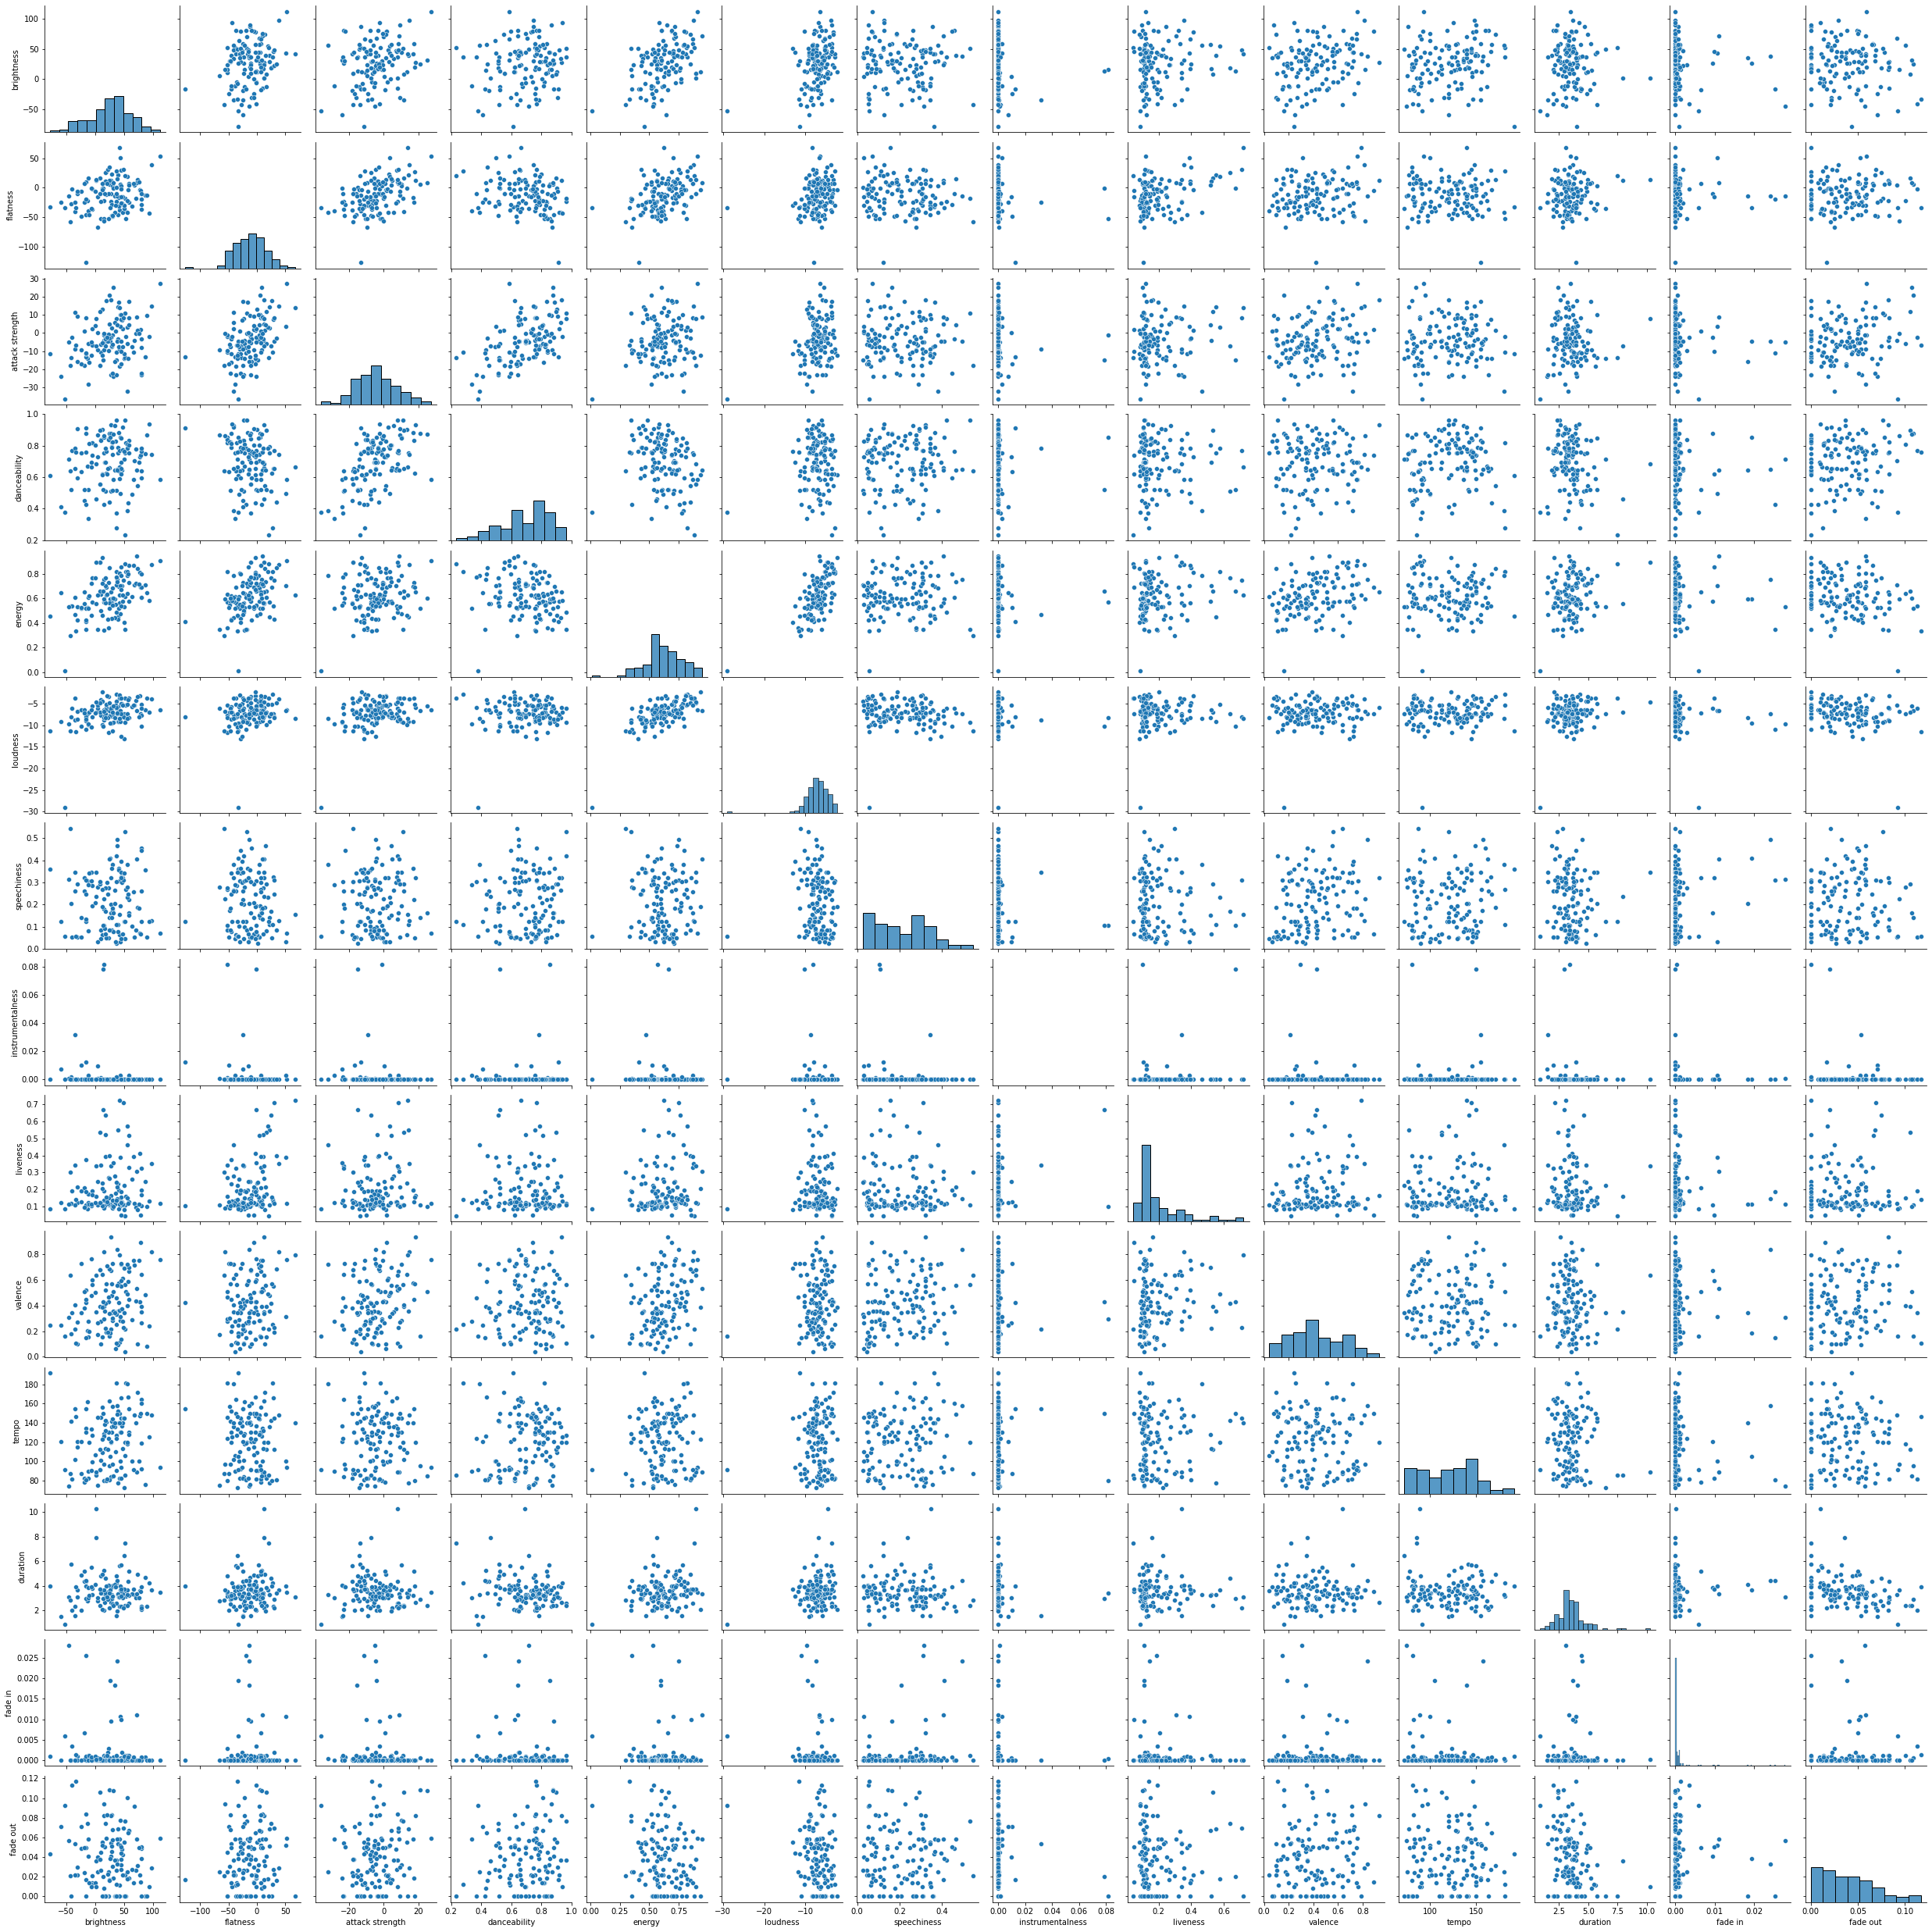

In [12]:
sns.pairplot(df[["brightness", "flatness", "attack strength", "danceability", "energy",  "loudness" ,
            "speechiness", "instrumentalness", "liveness", "valence", "tempo", "duration", "fade in", "fade out"]])

Besides number of album tracks, brightness and loudness are the most correlated to popularity (though the correlation is still fairly low in absolute terms). They don't seem to be particularly highly correlated towards each other either. To visualize this, we can use a bubble plot.

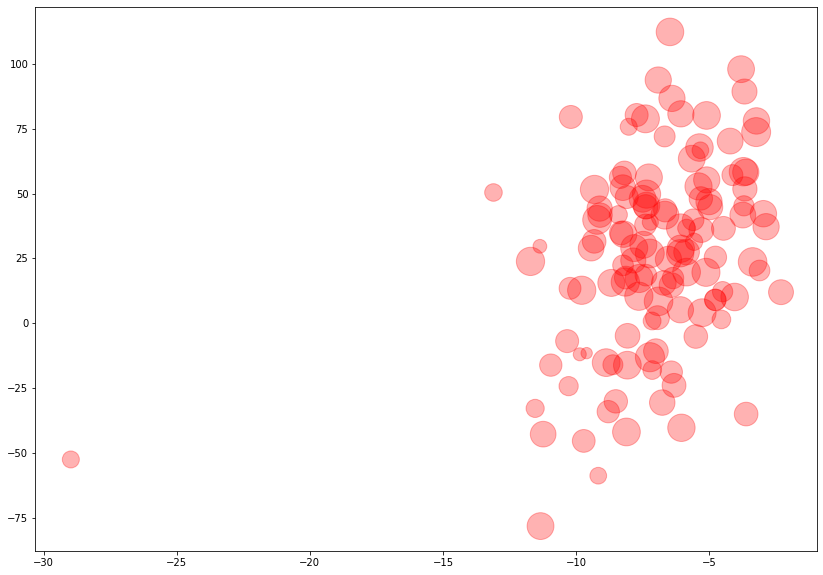

In [13]:
import matplotlib.pyplot as pt
pt.figure(figsize=(14, 10))
pt.scatter(df["loudness"], df["brightness"], s = df["Popularity"]*10, alpha=0.3, color = 'red')

The purpose of the visualizations above in terms of exploratary data analysis for our feature engineering will be explained in the modelling section. To summarize, it seems reasonable to reduce our quantitative variables to the ones listed earlier under the visualization of variables correlating with popularity only. The purpose of the visualizations below that were to see if we could reduce dimensions even further, but the correlations between the features of interest aren't high, so we likely keep them. 

# Visualizing Textual Data using Tfidf Vectorizer and WordCloud

In [14]:
df = df.dropna()
df

,Title,Popularity,Artist,Album,Number of Tracks in Album,Related Artists,Explicit,Average Duration of Segments,brightness,flatness,...,liveness,valence,tempo,duration,time_signature,fade in,fade out,info,Lyrics,Popularity Categories
0,God's Plan,83.0,Drake,Scorpion,25,"Big Sean, J. Cole, DJ Khaled, Meek Mill, Futur...",Explicit,231.890759,39.845464,21.759221,...,0.552,0.357,77.169,3.316217,4,0.000000,0.068333,Drake may refer to:,"Yeah, they wishin' and wishin' and wishin' and...",High
1,Lucid Dreams,83.0,Juice WRLD,Goodbye & Good Riddance,17,"NAV, Comethazine, Trippie Redd, Lil Tecca, Blu...",Explicit,250.671292,26.918125,-22.883286,...,0.340,0.218,83.903,3.997267,4,0.000314,0.054277,"Jarad Anthony Higgins (December 2, 1998 – Dece...","Enviyon on the mix No, no, no, no No, no, no,...",High
2,SICKO MODE,81.0,Travis Scott,ASTROWORLD,17,"A$AP Rocky, A$AP Ferg, Chief Keef, Joey Bada$$...",Explicit,236.685634,58.408027,-24.692282,...,0.124,0.446,155.008,5.213667,4,0.000000,0.018448,"Jacques Bermon Webster II (born April 30, 1991...","Astro' Yeah Sun is down, freezing cold That's...",High
3,a lot,80.0,21 Savage,i am > i was,15,"Quavo, Gunna, Young Thug, Don Toliver, Huncho ...",Explicit,283.760186,10.461452,-52.394945,...,0.342,0.274,145.972,4.810400,4,0.000229,0.044449,"Shéyaa Bin Abraham-Joseph (born October 22, 19...",I love you Turn my headphone down a little bit...,High
4,Plug Walk,69.0,Rich The Kid,The World Is Yours,15,"Quality Control, Famous Dex, Baka Not Nice, Yu...",Explicit,223.249444,24.667761,6.185388,...,0.108,0.158,94.981,2.920500,4,0.000565,0.108696,"Dimitri Leslie Roger (born July 13, 1992),[3][...","Ayy, ayy, plug walk (plug walk, plug, plug) I ...",Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,OD,32.0,Earl Sweatshirt,FEET OF CLAY,7,"MellowHype, Domo Genesis, Vince Staples, Mike ...",Explicit,258.737655,36.678746,-10.348722,...,0.134,0.458,123.287,1.584617,1,0.001159,-0.000003,"Thebe Neruda Kgositsile (born February 24, 199...","Give it up, we Somebody tooted in the student...",Low
121,Lost and Found,19.0,Domo Genesis,Genesis,12,"MellowHype, Mike G, MellowHigh, Jet Age of Tom...",Explicit,262.822182,29.689132,-47.382963,...,0.104,0.725,97.017,2.560667,4,0.000000,0.068005,"Dominique Marquis Cole (born March 9, 1991), k...",Some of those you can take off though I don't ...,Low
124,Gwendolynn's Apprehension,46.0,Mick Jenkins,Pieces of a Man,17,"Saba, Pivot Gang, Kirk Knight, Rejjie Snow, AK...",Explicit,264.972310,9.048543,-10.534785,...,0.120,0.680,91.352,3.758883,4,0.000438,0.037645,Mick Jenkins may refer to:,"We, real cool We, left school We, lurk late We...",Low
126,Truman,35.0,Lil Dicky,Professional Rapper,20,"VIC MENSA, Bryce Vine, Chris Webby, Hoodie All...",Explicit,287.618539,1.527897,13.110137,...,0.339,0.636,88.748,10.242733,4,0.000133,0.010241,"David Andrew Burd (born March 15, 1988), bette...",Ay Man Man Ay I guess ya'll on board Young ma...,Low


We remove some of the stop words either because they're obvious and common or because they're swear words and we tried removing them from the word cloud. Unfortunatley the swear words are a vital part of most hiphop songs and they managed to make it to the word cloud anyways. 

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features = 500, stop_words = ["the", "an", "a", 'in', 'and', 'on', 'in', 'of', 'if', 'we', 'at',
                                                        'if', 'too', 'or', 'then', 'had', 'said', 'nigga', 'hoe', 'niggas', 'fuck', 'bitch'
                                                        'shit', 'it', 'this', 'to', 'my', 'that', 'they', 'got', 'get', 'was', 'be', 'for',
                                                        'with', 'is', 'me', 'you', 'is', 'go', 'not', 'off', 'your', 'so', 'just', 'can', 'all'
                                                        'no', 'but', 'yeah', 'know', 'what', 'when', 'put', 'how', 'her', 'from', 'do', 'about',
                                                        'took', 'much', 'iti', 'hoes', 'am', 'up', 'cause', 'like', 'as', 'all', 'been'])
vec.fit(df["Lyrics"])
tfidf_mat = vec.transform(df["Lyrics"])
df_idf = pd.DataFrame(tfidf_mat.todense(), columns = sorted(vec.vocabulary_.keys()))
text = ''
for word in df_idf.sum(axis="rows").sort_values(ascending = False).index:
  text += (word + ' ')
text

'don bitch ain she no uh shit out need back ayy lil want tell these love now em let down man never some gotta oh wanna time tryna really say see new them gon money take baby why he look still come way make ma woo hit one life two through run ooh god where same die made right who ass give feel here are smoke away call won real over have every beat gang big black ll always drop everybody even by ve mmm though came than ready us told work club cool light hold keep pop bout day half gettin hard girl might better play only think re soon around damn song world outside ya move white fast done skrrt ride watch could top there lot boom nobody mean would bad little mind good head night leave living inside young roll whoa home care side whole into used skrt cut sip did wrist stop more walk hood long sometimes wave body high tay while things school grave coupe seen write ten talk straight pussy feeling kill trust find car rap thing hmm myself diamonds left ever hell heart count low goin five eyes 

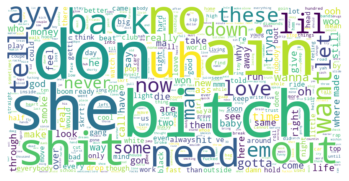

In [16]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='white',width=800, height=400, max_words=500).generate_from_frequencies(df_idf.sum(axis="rows").sort_values(ascending = False))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The word cloud, and all the common words we had to exclude, lead us to believe that lyrics aren't going to be as important of a differentiator as we thought. In retrospect this makes sense because the popular rap songs of today have very similar and basicc lyrics. This isn't a negative thing; the appeal of the genre is its creativity with its musicality. It just means lyrics are unlikely to be great for prediction, as we'll see in the modelling section. 

In [17]:
# downloading the DataFrame as CSV
from google.colab import files
df.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>